<a href="https://colab.research.google.com/github/ritwiks9635/CNN_Project_File/blob/main/Butterfly__Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pathlib
url = 'https://cricsheet.org/downloads/ipl.zip'
csv_file = '/root/.keras/datasets/ipl.zip'
tf.keras.utils.get_file ("ipl.zip", url, extract = True)
#df = pd.read_csv(csv_file)
#kegal
import os
os.environ['KAGGLE_USERNAME'] = "ritwiksarkar2"
os.environ['KAGGLE_KEY'] = "93e9e00c563a5345d48b05cdb87092d9"
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
#os path
api.dataset_download_files( "tanlikesmath/the-oxfordiiit-pet-dataset",path="https://www.kaggle.com/datasets/tanlikesmath/the-oxfordiiit-pet-dataset")
# unzip
! unzip /content/https:/www.kaggle.com/datasets/tanlikesmath/the-oxfordiiit-pet-dataset/the-oxfordiiit-pet-dataset.zip -d /content/data
#extract
# importing shutil module
import shutil

# Path of the file
filename = "https:/www.kaggle.com/datasets/ahemateja19bec1025/traffic-sign-dataset-classification/traffic-sign-dataset-classification.zip"
# Target directory
extract_dir = "datasets/"

# Unzip the file
shutil.unpack_archive(filename, extract_dir)
#cloude
from google.colab import drive
drive.mount('/content/drive')
#zipfile
from zipfile import ZipFile
data = "https:/www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/chest-xray-pneumonia.zip"
with ZipFile(data,"r") as zip:
  zip.extractall()
  print("the data has been extracted ")

# https://www.kaggle.com/datasets/veeralakrishna/butterfly-dataset

In [1]:
#kegal
import os
os.environ['KAGGLE_USERNAME'] = "ritwiksarkar2"
os.environ['KAGGLE_KEY'] = "93e9e00c563a5345d48b05cdb87092d9"
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
#os path
api.dataset_download_files( "veeralakrishna/butterfly-dataset",path="https://www.kaggle.com/datasets/veeralakrishna/butterfly-dataset")
# unzip

In [2]:
! unzip /content/https:/www.kaggle.com/datasets/veeralakrishna/butterfly-dataset/butterfly-dataset.zip

Archive:  /content/https:/www.kaggle.com/datasets/veeralakrishna/butterfly-dataset/butterfly-dataset.zip
  inflating: leedsbutterfly/README.txt  
  inflating: leedsbutterfly/descriptions/001.txt  
  inflating: leedsbutterfly/descriptions/002.txt  
  inflating: leedsbutterfly/descriptions/003.txt  
  inflating: leedsbutterfly/descriptions/004.txt  
  inflating: leedsbutterfly/descriptions/005.txt  
  inflating: leedsbutterfly/descriptions/006.txt  
  inflating: leedsbutterfly/descriptions/007.txt  
  inflating: leedsbutterfly/descriptions/008.txt  
  inflating: leedsbutterfly/descriptions/009.txt  
  inflating: leedsbutterfly/descriptions/010.txt  
  inflating: leedsbutterfly/images/0010001.png  
  inflating: leedsbutterfly/images/0010002.png  
  inflating: leedsbutterfly/images/0010004.png  
  inflating: leedsbutterfly/images/0010005.png  
  inflating: leedsbutterfly/images/0010006.png  
  inflating: leedsbutterfly/images/0010007.png  
  inflating: leedsbutterfly/images/0010008.png  
 

In [3]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import cv2

In [4]:
path = "/content/leedsbutterfly/images"
files = os.listdir(path)
img_arr = []
labels = []
for f in files:
  label = int(f[:3])
  labels.append(label)
  img = cv2.imread(os.path.join(path, f), cv2.IMREAD_COLOR)
  img = cv2.resize(img, (220,220))
  img_arr.append(img)

In [5]:
name = {'001': 'Danaus_plexippus', '002': 'Heliconius_charitonius', '003': 'Heliconius_erato', '004': 'Junonia_coenia', '005': 'Lycaena_phlaeas',
        '006': 'Nymphalis_antiopa', '007': 'Papilio_cresphontes', '008': 'Pieris_rapae', '009': 'Vanessa_atalanta', '0010': 'Vanessa_cardui'}

In [6]:
print(set(labels))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


In [7]:
classes = []
for x in labels:
  lab = name['00'+str(x)]
  classes.append(lab)

print(set(classes[:10]))

{'Danaus_plexippus', 'Heliconius_charitonius', 'Junonia_coenia', 'Vanessa_cardui', 'Heliconius_erato', 'Vanessa_atalanta'}


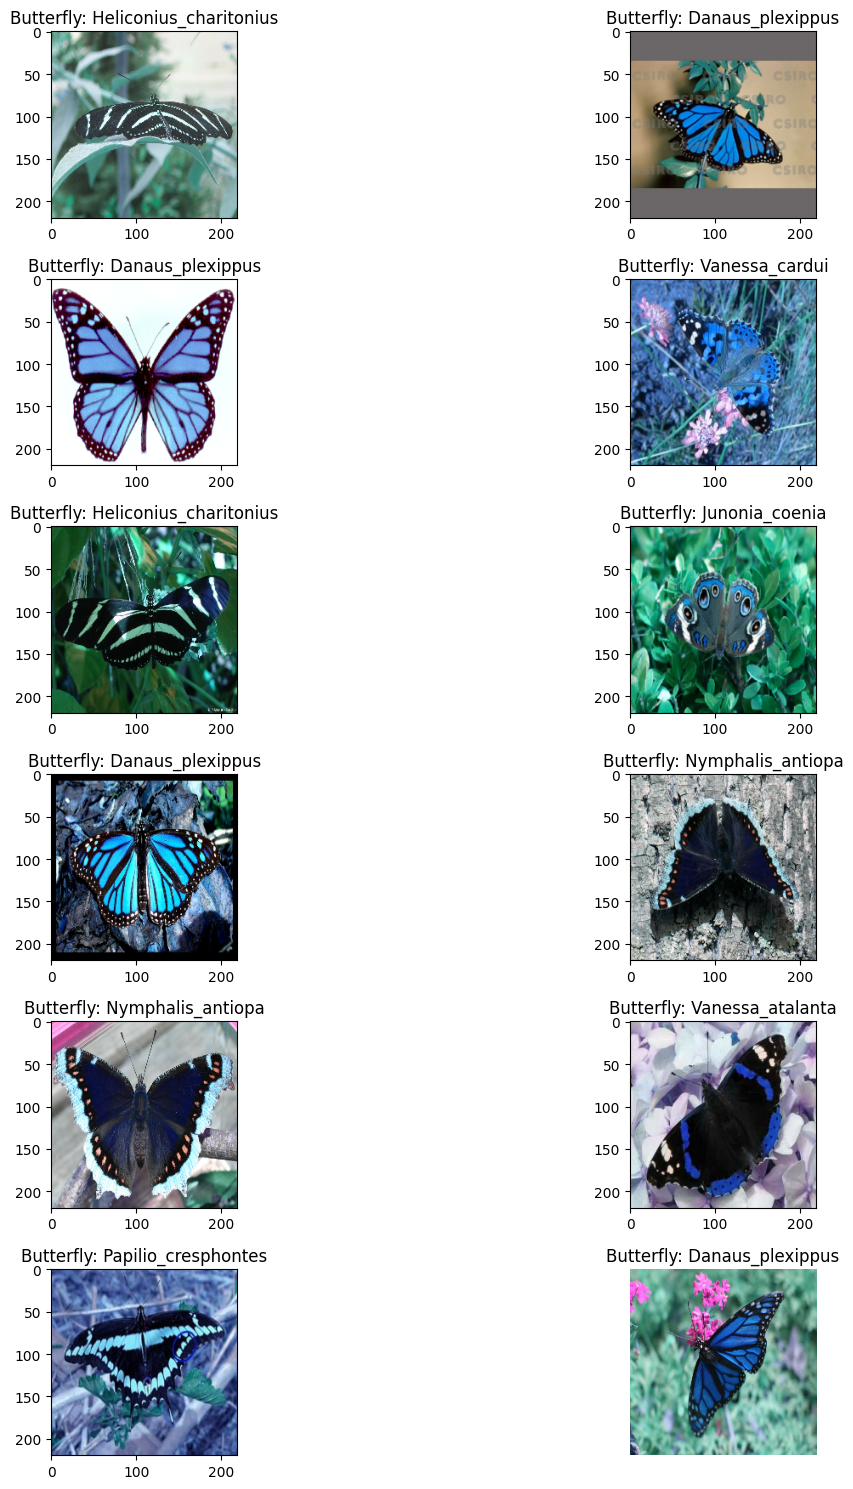

In [8]:
fig, ax = plt.subplots(6,2, figsize=(15,15))
for i in range(6):
  for j in range(2):
    x = np.random.randint(0, len(labels))
    ax[i,j].imshow(img_arr[x])
    ax[i,j].set_title( "Butterfly: " +str(classes[x]))
plt.axis("off")
plt.tight_layout()

In [9]:
img_arr = np.array(img_arr)
img_arr = img_arr / 255.0
img_array = img_arr.reshape(-1,220,220,3)
img_array.shape

(832, 220, 220, 3)

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
le = LabelEncoder()
y = le.fit_transform(classes)
y = to_categorical(y)
y.shape

(832, 10)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(img_array, y, test_size=0.2, random_state = 11)

In [12]:
application = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False, input_shape = (220,220,3), weights = "imagenet", pooling = "avg")

9406464/9406464 [==============================] - 0s 0us/step


In [13]:
model = tf.keras.Sequential([
    application,
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation = "softmax")
    ])

In [14]:
model.layers[0].trainable = False
model.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics=["accuracy"])

In [15]:
history = model.fit(x_train, y_train, batch_size = 12, epochs = 100, validation_split=0.3)

Epoch 1/100
39/39 [==============================] - 18s 388ms/step - loss: 1.8505 - accuracy: 0.3892 - val_loss: 1.0263 - val_accuracy: 0.7450
Epoch 2/100
39/39 [==============================] - 13s 337ms/step - loss: 0.7499 - accuracy: 0.8129 - val_loss: 0.5464 - val_accuracy: 0.9300
Epoch 3/100
39/39 [==============================] - 13s 338ms/step - loss: 0.4239 - accuracy: 0.9247 - val_loss: 0.3916 - val_accuracy: 0.9400
Epoch 4/100
39/39 [==============================] - 14s 363ms/step - loss: 0.2742 - accuracy: 0.9656 - val_loss: 0.2888 - val_accuracy: 0.9500
Epoch 5/100
39/39 [==============================] - 14s 373ms/step - loss: 0.2072 - accuracy: 0.9871 - val_loss: 0.2500 - val_accuracy: 0.9550
Epoch 6/100
39/39 [==============================] - 13s 337ms/step - loss: 0.1640 - accuracy: 0.9849 - val_loss: 0.2120 - val_accuracy: 0.9450
Epoch 7/100
39/39 [==============================] - 13s 335ms/step - loss: 0.1264 - accuracy: 0.9935 - val_loss: 0.2087 - val_accuracy:

In [19]:
loss, accuracy  = model.evaluate(x_test, y_test)

6/6 [==============================] - 4s 571ms/step - loss: 0.0698 - accuracy: 0.9701


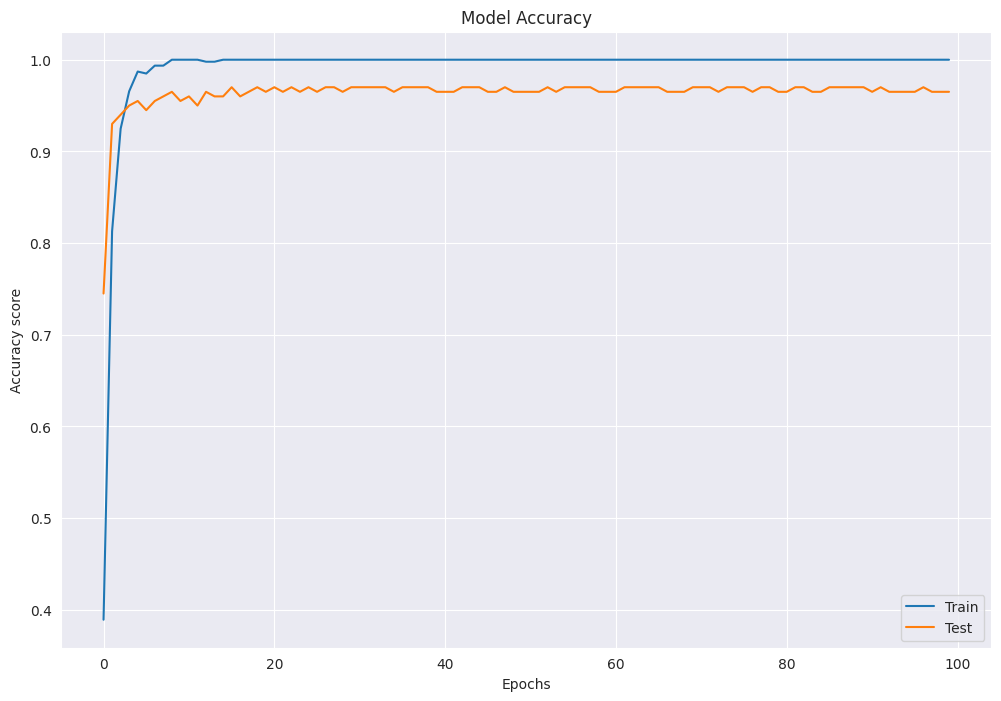

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy score')
plt.title('Model Accuracy')
plt.legend(['Train','Test'])
plt.show()

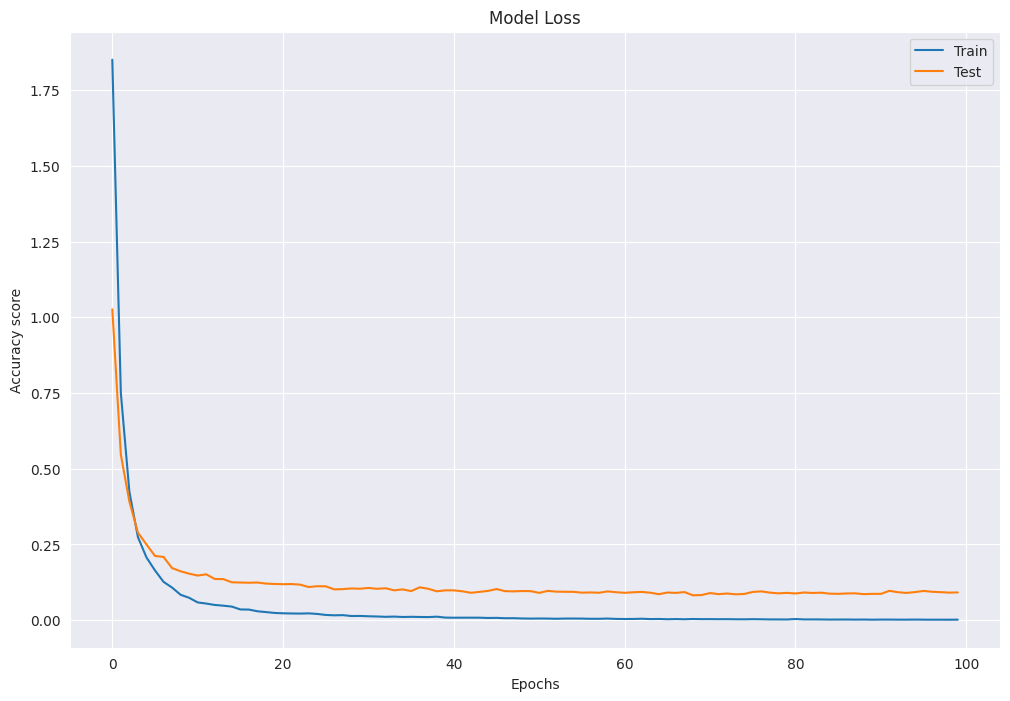

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy score')
plt.title('Model Loss')
plt.legend(['Train','Test'])
plt.show()

In [23]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

6/6 [==============================] - 6s 904ms/step


In [25]:
corr_pred = []
incorr_pred = []
for i in range(len(y_test)):
  if (np.argmax(y_test[i]) != pred[i]):
    incorr_pred.append(i)
  if len(incorr_pred) == 10:
    break

for i in range(len(y_test)):
  if (np.argmax(y_test[i]) == pred[i]):
    corr_pred.append(i)
  if len(corr_pred) == 10:
    break

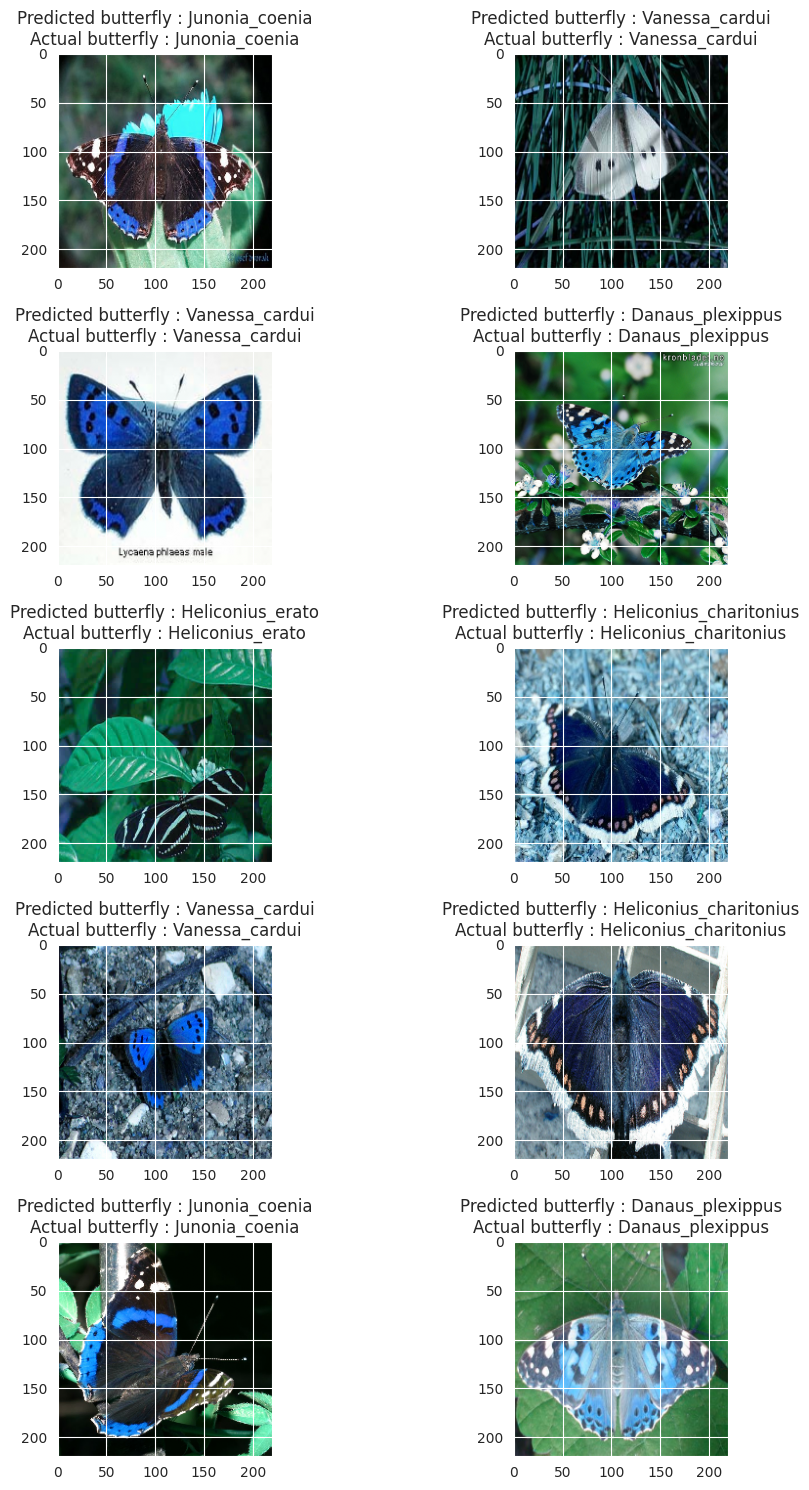

In [31]:
fig, ax = plt.subplots(5,2, figsize=(15,15))
count = 0
for i in range(5):
    for j in range(2):
        ax[i,j].imshow(x_test[corr_pred[count]])
        ax[i,j].set_title("Predicted butterfly : "+ classes[pred[corr_pred[count]]] +"\n"+"Actual butterfly : "+ classes[np.argmax(y_test[corr_pred[count]])])
        plt.tight_layout()
        count+=1

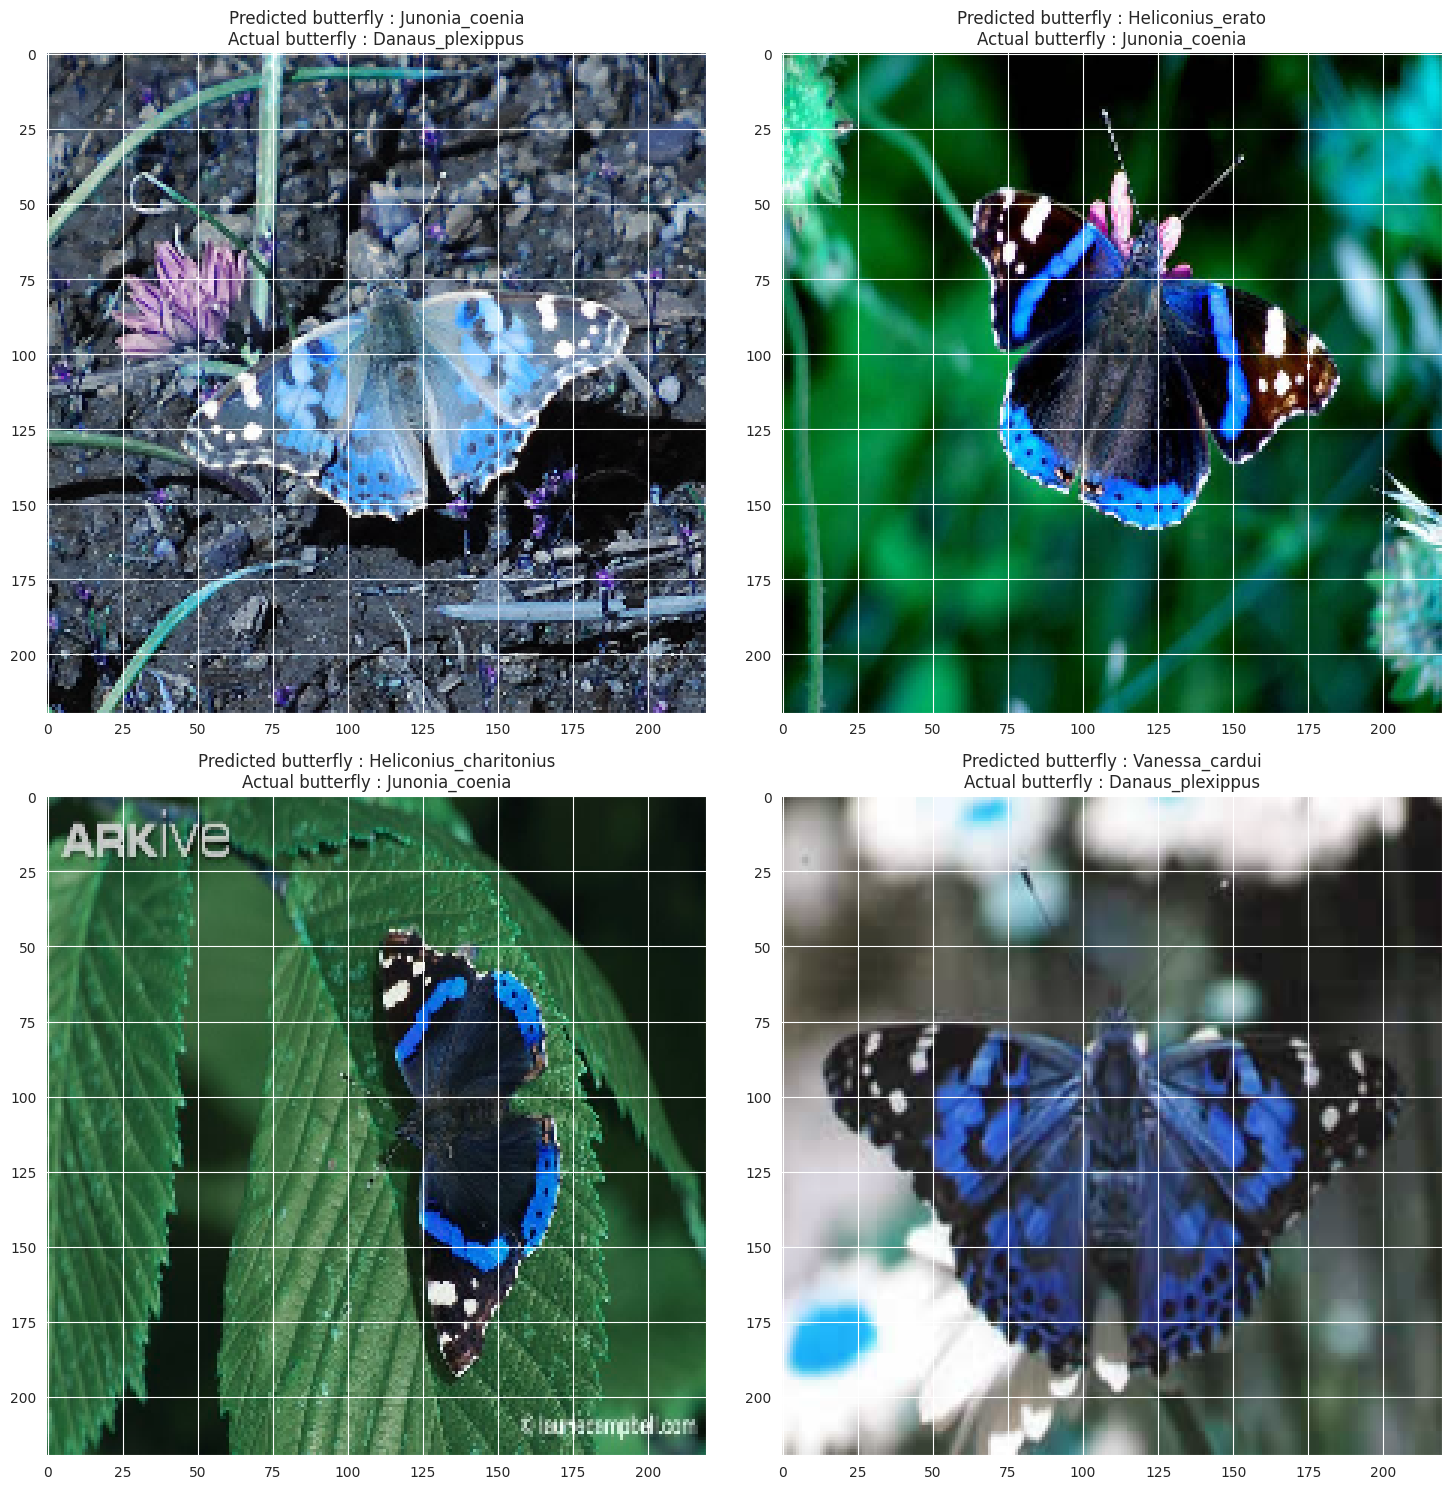

In [33]:
fig, ax = plt.subplots(2,2, figsize=(15,15))
count = 0
for i in range(2):
    for j in range(2):
        ax[i,j].imshow(x_test[incorr_pred[count]])
        ax[i,j].set_title("Predicted butterfly : "+ classes[pred[incorr_pred[count]]] +"\n"+"Actual butterfly : "+ classes[np.argmax(y_test[incorr_pred[count]])])
        plt.tight_layout()
        count+=1